# Bank Customer Churn Prediction

`Project Goal:` This project aims to build a predictive model that identifies bank customers likely to churn. By understanding churn drivers, the bank can proactively retain valuable customers.




**Methodology:**




`Data Preparation: `We will load the bank customer dataset,
explore its characteristics, and preprocess it for model training. This includes cleaning data, handling missing values, and converting categorical variables.


`Addressing Class Imbalance:` We will tackle the issue of unequal churned and non-churned customers using techniques like under- and over-sampling.


`Model Building and Evaluation:` We will train a Support Vector Machine (SVM) model on the prepared data and evaluate its performance using metrics like accuracy, precision, and recall. We will also fine-tune the model to optimize its predictive power.


`Insights and Conclusions:` We will draw conclusions based on the model's predictions and provide insights into the factors that influence customer churn, enabling the bank to develop targeted retention strategies.


`Tools: `This project uses Python libraries like Pandas, Scikit-learn, and Imbalanced-learn for data analysis and machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
df.duplicated('CustomerId').sum()

0

In [6]:
df= df.set_index('CustomerId')

In [7]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# Data Cleaning & Data Encoding

In [9]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [10]:
df.replace({'Geography': {'France':2, 'Germany':1, 'Spain':0 }})

<ipython-input-10-573d36d0b17d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Geography': {'France':2, 'Germany':1, 'Spain':0 }})


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,2,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,0,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,2,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,2,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,0,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,2,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,2,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,2,Female,36,7,0.00,1,0,1,42085.58,1


In [11]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [12]:
df.replace({'Gender': {'Male':0, 'Female':1}})

<ipython-input-12-473a163f1e54>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender': {'Male':0, 'Female':1}})


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,0,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,0,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,1,36,7,0.00,1,0,1,42085.58,1


In [13]:
df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [14]:
df.replace({'NumOfProducts': {1:0, 2:1, 3:1, 4:1}})

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [15]:
df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [16]:
df.loc[df['Balance']==0 , 'Churn'].value_counts()

,count
Churn,
0,3117
1,500


In [17]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<Axes: >

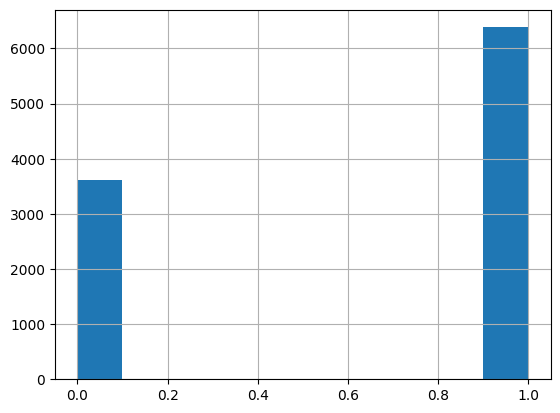

In [18]:
df['Zero Balance'].hist()

# Defining Label And Features

In [19]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [20]:
X = df.drop(['Surname','Churn'], axis=1)

In [21]:
y = df['Churn']

In [22]:
X.shape, y.shape

((10000, 11), (10000,))

In [23]:
df['Churn'].value_counts()

,count
Churn,
0,7963
1,2037


<Axes: xlabel='Churn', ylabel='count'>

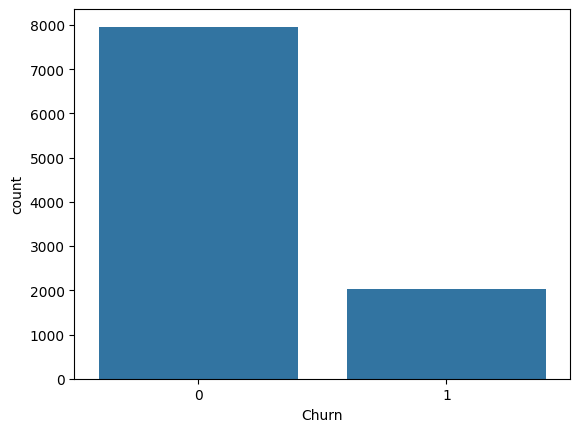

In [24]:
sns.countplot(x = 'Churn', data = df)

In [25]:
X.shape, y.shape

((10000, 11), (10000,))

# Random Under sampling

In [26]:
from imblearn.under_sampling import RandomUnderSampler

In [27]:
rus = RandomUnderSampler()

In [28]:
X_rus, y_rus = rus.fit_resample(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [29]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [30]:
y.value_counts(), y_rus.value_counts()

(Churn
 0    7963
 1    2037
 Name: count, dtype: int64,
 Churn
 0    2037
 1    2037
 Name: count, dtype: int64)

<Axes: >

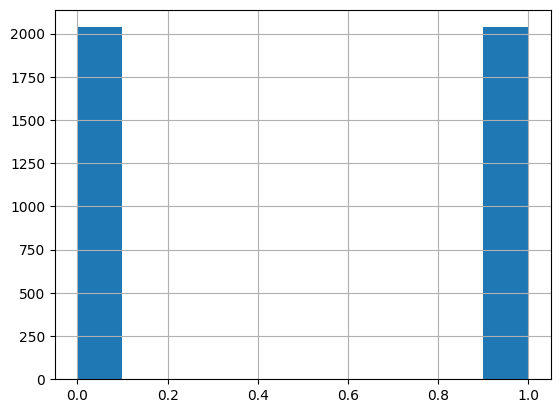

In [31]:
y_rus.hist()

# Random Over Sampling

In [32]:
from imblearn.over_sampling import RandomOverSampler

In [33]:
ros = RandomOverSampler(random_state=2529)

In [34]:
X_ros, y_ros = ros.fit_resample(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [35]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [36]:
y.value_counts(), y_ros.value_counts()

(Churn
 0    7963
 1    2037
 Name: count, dtype: int64,
 Churn
 1    7963
 0    7963
 Name: count, dtype: int64)

<Axes: >

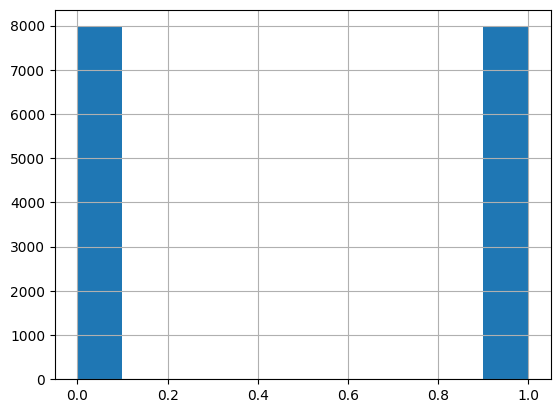

In [37]:
y_ros.hist()

# Spliting the Data for Test & Train

In [38]:
from sklearn.model_selection import train_test_split

Spliting The Original Data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2529)

Spliting The Random_under_sampled Data

In [40]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.4, random_state=2529)

Spliting The Random_over_sampled Data

In [41]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.4, random_state=2529)

# Standardize Features for Model

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()

In [44]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [45]:
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [46]:
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [47]:
X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [48]:
X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [49]:
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

# Support Vecter Mechine Classifire

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
svc = SVC()

In [52]:
# Before fitting the model, convert categorical features to numerical using one-hot encoding:
X_train = pd.get_dummies(X_train, columns=['Geography', 'Gender'], drop_first=True) # 'drop_first=True' to avoid multicollinearity
X_test = pd.get_dummies(X_test, columns=['Geography', 'Gender'], drop_first=True)
X_train_rus = pd.get_dummies(X_train_rus, columns=['Geography', 'Gender'], drop_first=True)
X_test_rus = pd.get_dummies(X_test_rus, columns=['Geography', 'Gender'], drop_first=True)
X_train_ros = pd.get_dummies(X_train_ros, columns=['Geography', 'Gender'], drop_first=True)
X_test_ros = pd.get_dummies(X_test_ros, columns=['Geography', 'Gender'], drop_first=True)

Fiting SVM on Raw/Original Data

In [53]:
svc.fit(X_train, y_train)

SVC()

In [54]:
y_pred = svc.predict(X_test)

In [55]:
confusion_matrix(y_test, y_pred)

array([[3140,   49],
       [ 542,  269]])

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      3189
           1       0.85      0.33      0.48       811

    accuracy                           0.85      4000
   macro avg       0.85      0.66      0.70      4000
weighted avg       0.85      0.85      0.83      4000



Fiting SVM on Random_under_sampled Data

In [57]:
svc.fit(X_train_rus, y_train_rus)

SVC()

In [58]:
y_pred_rus = svc.predict(X_test_rus)

In [59]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[673, 146],
       [242, 569]])

In [60]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       819
           1       0.80      0.70      0.75       811

    accuracy                           0.76      1630
   macro avg       0.77      0.76      0.76      1630
weighted avg       0.77      0.76      0.76      1630



Fiting SVM on Random_over_sampled Data

In [61]:
svc.fit(X_train_ros, y_train_ros)

SVC()

In [62]:
y_pred_ros = svc.predict(X_test_ros)

In [63]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[2547,  607],
       [ 750, 2467]])

In [64]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      3154
           1       0.80      0.77      0.78      3217

    accuracy                           0.79      6371
   macro avg       0.79      0.79      0.79      6371
weighted avg       0.79      0.79      0.79      6371



# **Hyperparametre Tuning**


In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf'],
              'class_weight' : ['balanced']}

In [67]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.9s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [68]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [69]:
grid_predictions = grid.predict(X_test_ros)

In [70]:
confusion_matrix(y_test_ros, grid_predictions)

array([[2730,  424],
       [ 142, 3075]])

In [71]:
print(classification_report(y_test_ros, grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3154
           1       0.88      0.96      0.92      3217

    accuracy                           0.91      6371
   macro avg       0.91      0.91      0.91      6371
weighted avg       0.91      0.91      0.91      6371



# Conclusion

This code analyzes bank customer churn using a machine learning workflow. It preprocesses the data, addresses class imbalance with under- and over-sampling, and standardizes features. A Support Vector Machine (SVM) classifier is trained and evaluated on different versions of the data. Hyperparameter tuning with GridSearchCV optimizes the SVM's performance. The analysis aims to build a model for predicting and understanding customer churn.

In conclusion, the code demonstrates a practical approach to bank customer churn prediction. By carefully preprocessing the data, handling imbalance, and tuning the model, it aims to build an accurate and insightful tool for customer retention strategies. Further analysis of model performance and feature importance can provide actionable insights for businesses.
